<a id="1"></a>
# <div style="text-align:center; padding:20px 40px; color:white; margin:0; font-size:35px; font-family:Serif; display:fill; border-radius:15px; background-color:#DB9700; box-sizing: border-box;"><b>📈 Model Metrics 📉</b></div>


### Import Modules and Packages

In [1]:
import sys
sys.path.insert(0, '../')

from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from sqlalchemy.ext.declarative import declarative_base

from Kafka.kafka_functions import *

from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt


#### Extracting Data from Database

In [2]:
engine_creation()
World_Happiness = extract_db()
World_Happiness

,id,GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom,Government_Corruption_Perception,Generosity,Year,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North_America,Continent_Oceania,Continent_South_America,Happiness_Score,Happiness_Prediction
0,1,1.137640,1.23617,0.669260,0.36679,0.030050,0.001990,2015,0,0,1,0,0,0,5.716,5.79346
1,2,0.590660,0.73803,0.549090,0.59591,0.242490,0.421920,2015,0,1,0,0,0,0,4.876,4.93586
2,3,0.806000,1.23100,0.639000,0.46100,0.082000,0.065000,2018,0,0,0,1,0,0,6.167,5.68981
3,4,0.541000,0.87200,0.080000,0.46700,0.103000,0.146000,2018,1,0,0,0,0,0,4.671,4.44168
4,5,1.159910,1.13935,0.875190,0.51469,0.010780,0.137190,2015,0,0,1,0,0,0,5.102,6.00466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,231,0.873700,0.80975,0.596000,0.37269,0.106130,0.088770,2016,0,0,0,1,0,0,6.068,5.23328
231,232,0.864020,0.99903,0.790750,0.48574,0.180900,0.115410,2015,0,0,0,0,0,1,5.975,6.00497
232,233,1.053510,1.24823,0.787230,0.44974,0.084840,0.114510,2015,0,0,0,0,0,1,6.574,6.53229
233,234,1.080170,1.03817,0.440060,0.37408,0.284670,0.225670,2016,0,1,0,0,0,0,5.658,5.37854


#### Assign variable to test and the other to predict

In [3]:
y_test = World_Happiness['Happiness_Score']
y_pred = World_Happiness['Happiness_Prediction']

In [4]:
R2 = r2_score(y_test, y_pred)

print("Coefficient of determination: ", R2)

Coefficient of determination:  0.8545621993131498


A value of 0.854 suggests that approximately 85.4% of the variability of the data is explained by the model. This is a good value, indicating that the model has a good adjustment to the data.

In [5]:
MSE = mean_squared_error(y_test, y_pred)

print("Mean squared error: ", MSE)

Mean squared error:  0.19122160721721967


The mean squared error (MSE) is a metric that calculates the mean of the squares of the differences between the predicted values ​​and the real values. An MSE of 0.19122160721721967 means that, on average, the model's predictions have an average quadratic error of approximately 0.1912. A lower MSE indicates a better model performance, since it shows that predictions are closer to real values. In this case, an MSE of 0.19122160721721967 suggests that the model is reasonably precise, with relatively small differences between predicted values ​​and real values.

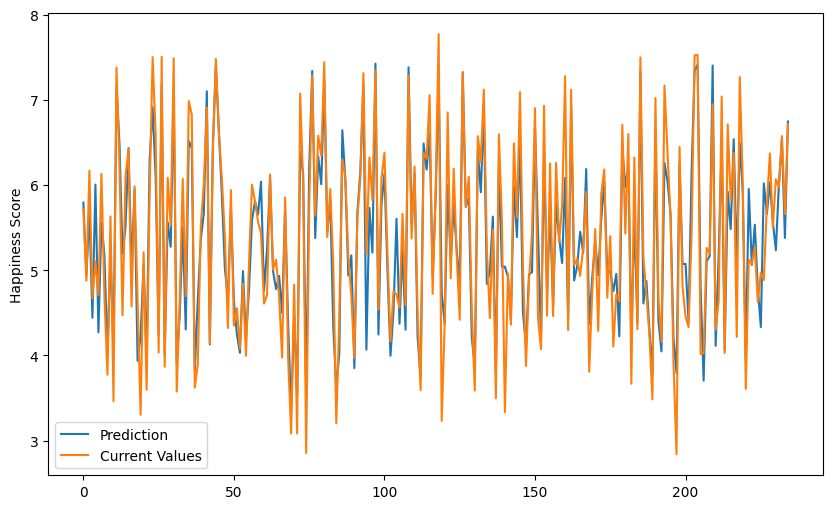

In [6]:
plt.figure(figsize=(10, 6))

plt.plot(y_pred, label='Prediction')
plt.plot(y_test.values, label='Current Values')


plt.ylabel('Happiness Score')
plt.legend()

plt.show()

As you can see in this graph, the model predicts the data well, and the predicted values ​​fit well with the current/real values.

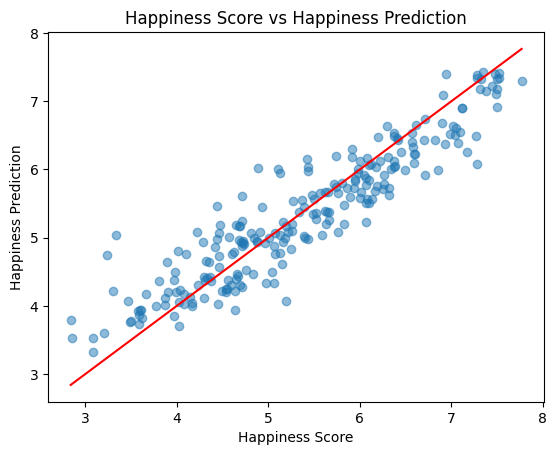

In [7]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Happiness Score')
plt.ylabel('Happiness Prediction')
plt.title('Happiness Score vs Happiness Prediction')
plt.show()

What could be seen in this graph is that the proximity of the points to the red line indicates the accuracy of the model. Points close to the red line suggest that the predictions are very close to the observed values.
The spread of the points around the red line shows the model error. The more spread out the points are, the greater the error. That is, in this case the model predicts the Happiness Score reasonably well, given that most of the points are close to the identity line and follow a linear trend.